In [1]:
import os
import time

import pyro
import seaborn as sns
import torch

pyro.settings.set(module_local_params=True)

sns.set_style("white")

seed = 123
pyro.clear_param_store()
pyro.set_rng_seed(seed)

import seaborn as sns
import torch

from collab.foraging import locust as lc

smoke_test = "CI" in os.environ
start = 30
end = start + 2 if smoke_test else start + 12
num_samples = 10 if smoke_test else 150
num_iterations = 10 if smoke_test else 1500
notebook_starts = time.time()

In [2]:
locds = lc.LocustDS(
    data_code="15EQ20191202",
    start=start,
    end=end,
)

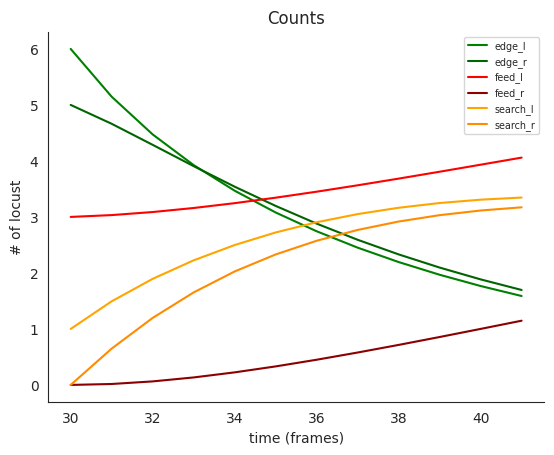

In [3]:
true_attraction = torch.tensor([0.01, 0.01, 0.01, 0.01, 0.01])
true_wander = torch.tensor([0.2, 0.1, 0.01, 0.05])

locds.simulate_trajectories(
    true_attraction=true_attraction,
    true_wander=true_wander,
)


locds.plot_simulated_trajectories()

In [4]:
locds.get_prior_samples(num_samples=num_samples, force=False)

# note, if you run with your own data, use force=True.
# Here we don't use force as we use pre-comupted samples
# obtained in the training and validation for multiple models
# which take a long time to run.

In [5]:
locds.run_inference(
    "length",
    num_iterations=num_iterations,
    num_samples=num_samples,
    lr=0.0005,
    # force=True,
    save=True,
)

# if you inspect the convergence by setting force=True, save = False,
# notice loss drops but the range of sites visited is still fairly wide
# this is because small changes in params can lead to large changes in
# a dynamical system, so loss even with low lr is a bit jumpy

Loading inference samples


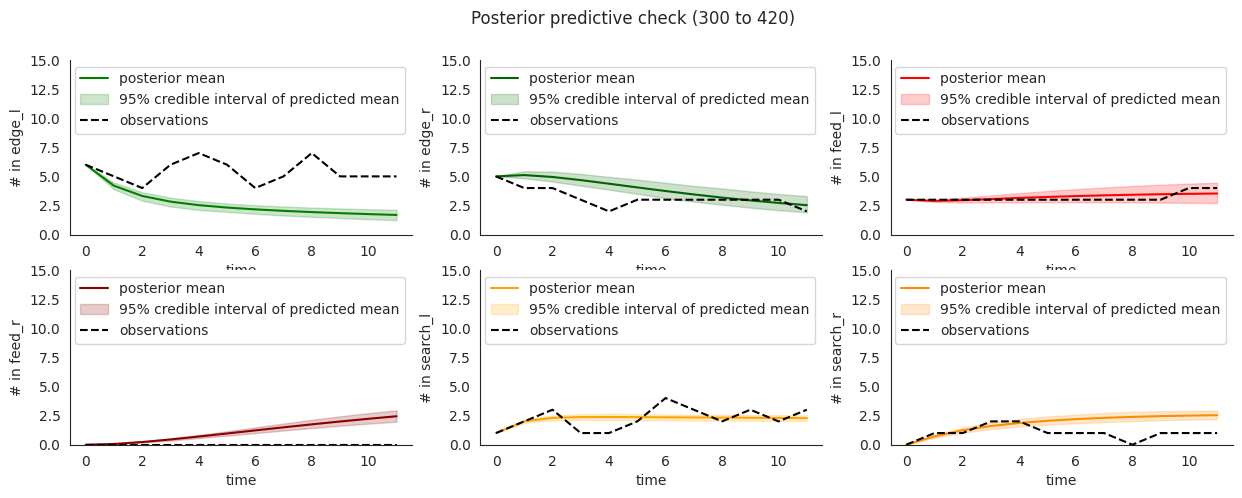

In [6]:
locds.posterior_check()

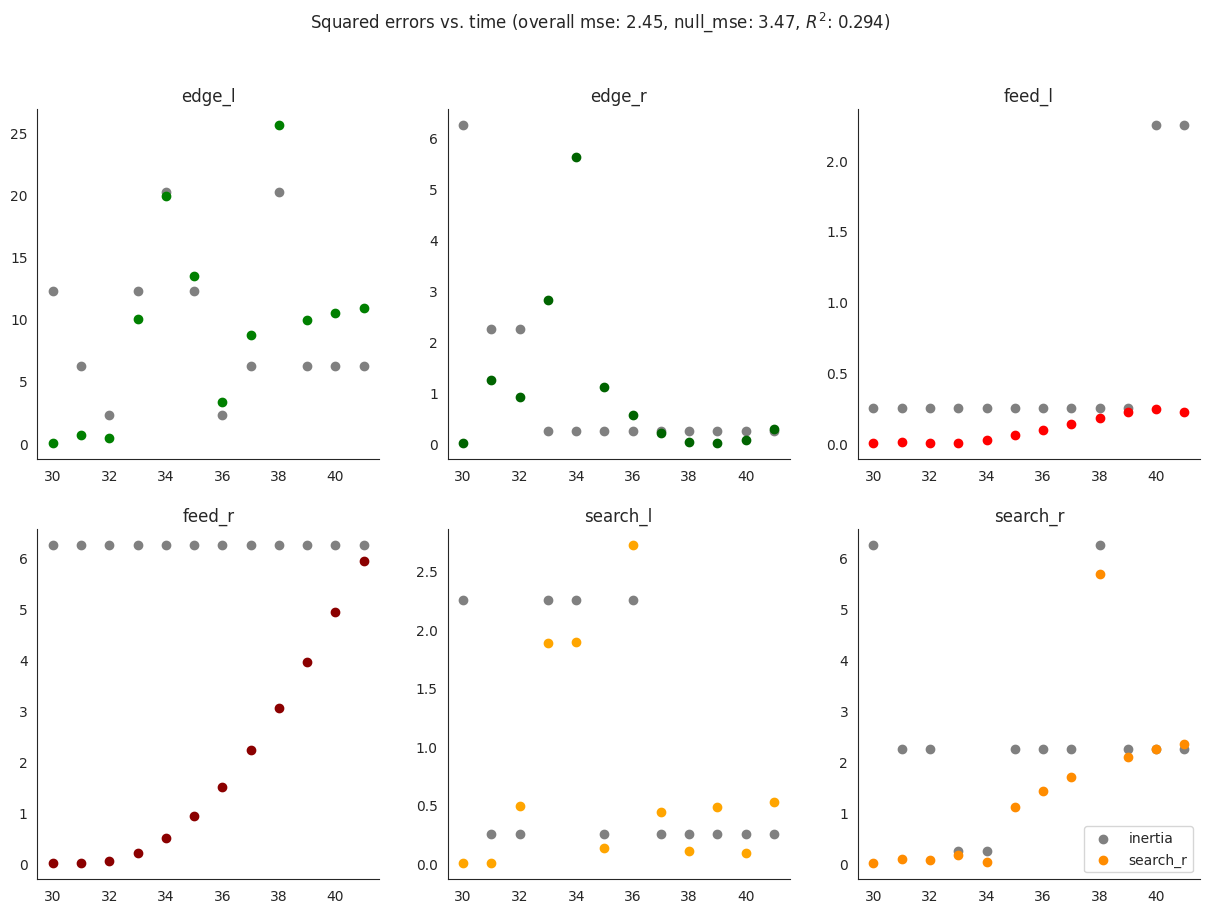

In [7]:
locds.evaluate(samples=locds.samples, subset=locds.subset)

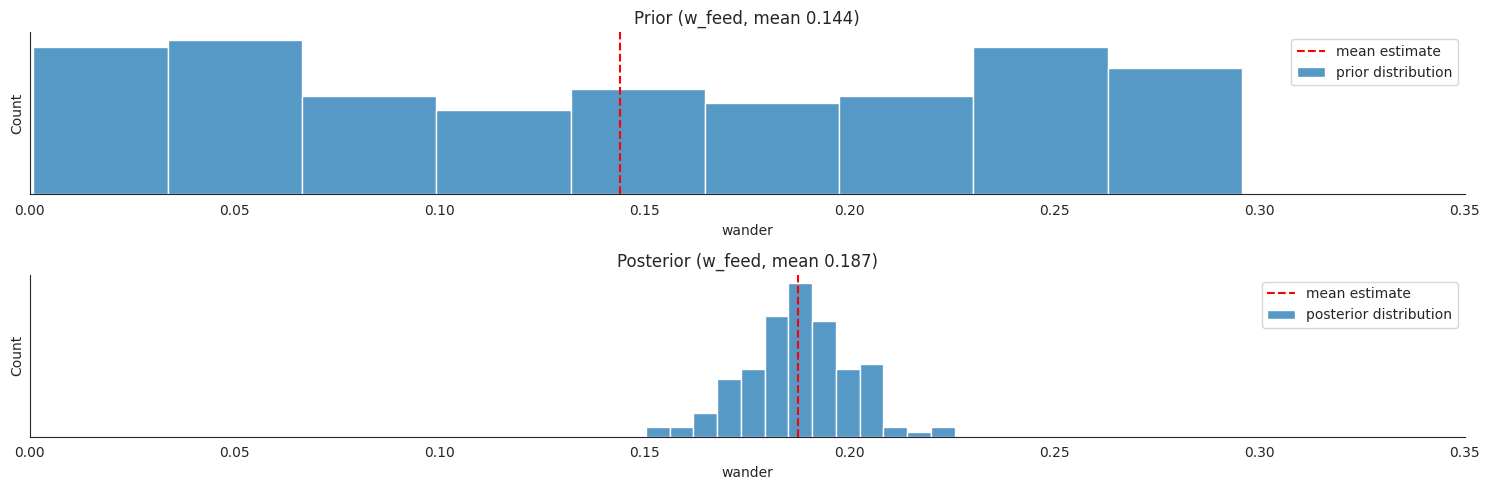

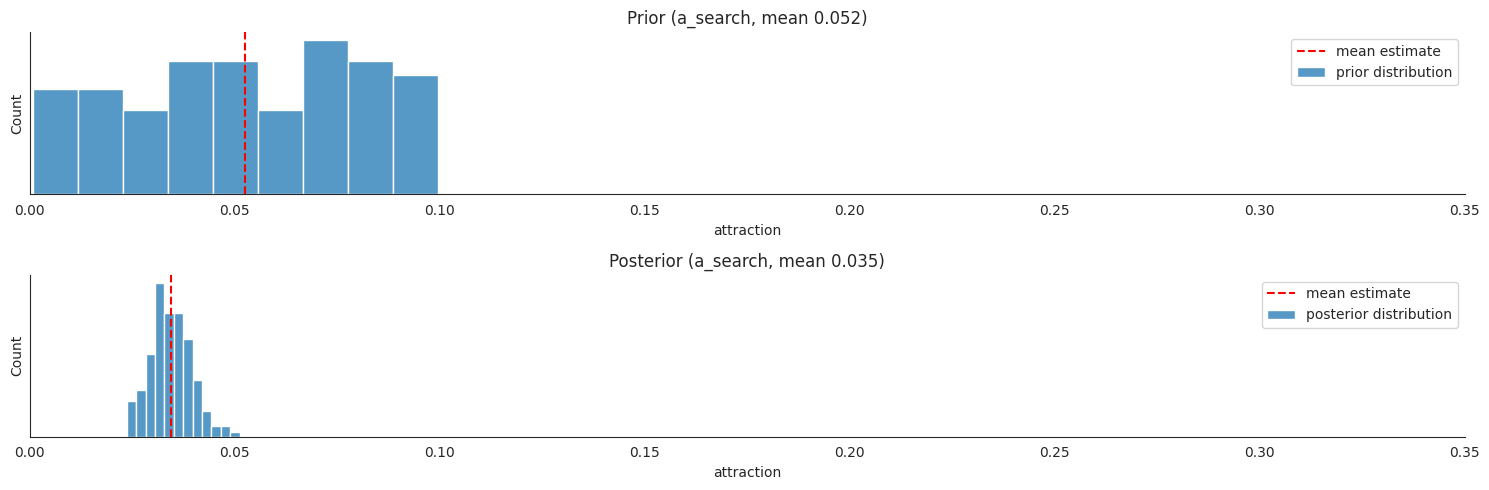

In [8]:
locds.plot_param_estimates(3, 3, xlim=0.35)

Loading validation samples


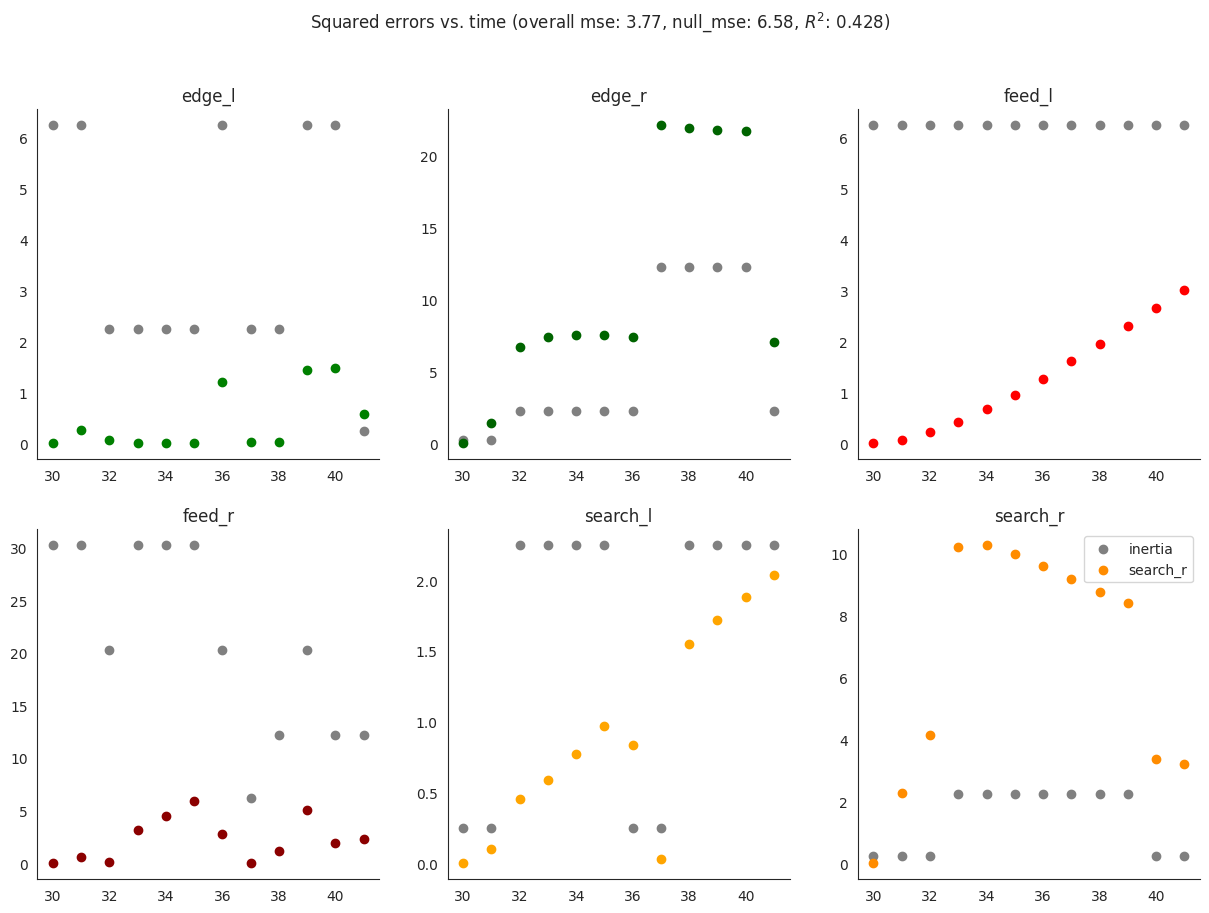

In [9]:
locds.validate(
    validation_data_code="15EQ20191205",
    num_iterations=num_iterations,
    num_samples=num_samples,
)  # , force = True, save = True)

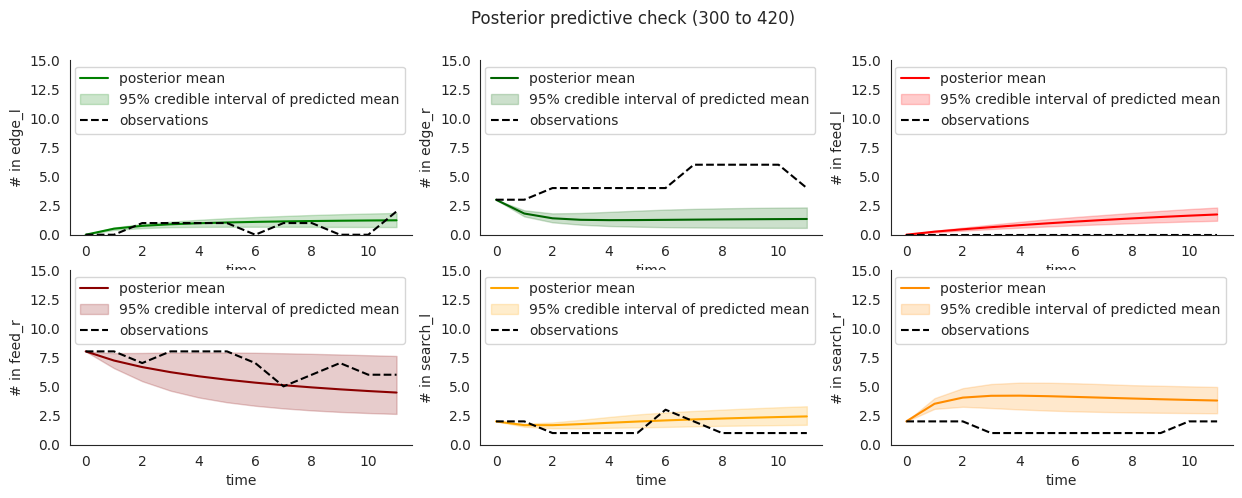

In [10]:
locds.posterior_check(
    samples=locds.v_samples, subset=locds.v_subset, save=False
)  # this also might a png file in docs/figures if save=True

In [11]:
notebook_ends = time.time()
print(
    "notebook took",
    notebook_ends - notebook_starts,
    "seconds, that is ",
    (notebook_ends - notebook_starts) / 60,
    "minutes to run",
)

notebook took 5.453246593475342 seconds, that is  0.09088744322458903 minutes to run
